In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("/content/loan_approval_dataset.csv")

In [3]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None
loan_id   

In [4]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [6]:
num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="most_frequent")

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [8]:
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [12]:
X = df.drop(" loan_status", axis=1)
y = df[" loan_status"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
print(y_train.value_counts())
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)
print(y_resampled.value_counts())

 loan_status
0    2125
1    1290
Name: count, dtype: int64
 loan_status
1    2125
0    2125
Name: count, dtype: int64


In [15]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"\n=== {model_name} ===")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [16]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_resampled, y_resampled)
evaluate_model(lr, X_test, y_test, "Logistic Regression")


=== Logistic Regression ===
[[460  71]
 [ 88 235]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       531
           1       0.77      0.73      0.75       323

    accuracy                           0.81       854
   macro avg       0.80      0.80      0.80       854
weighted avg       0.81      0.81      0.81       854



In [17]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_resampled, y_resampled)
evaluate_model(dt, X_test, y_test, "Decision Tree")


=== Decision Tree ===
[[514  17]
 [  2 321]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       531
           1       0.95      0.99      0.97       323

    accuracy                           0.98       854
   macro avg       0.97      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



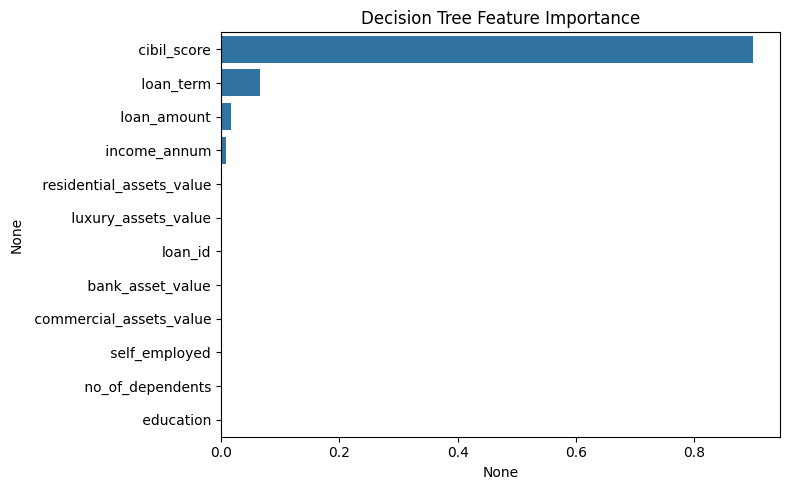

In [18]:
feature_importance = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Decision Tree Feature Importance")
plt.tight_layout()
plt.show()

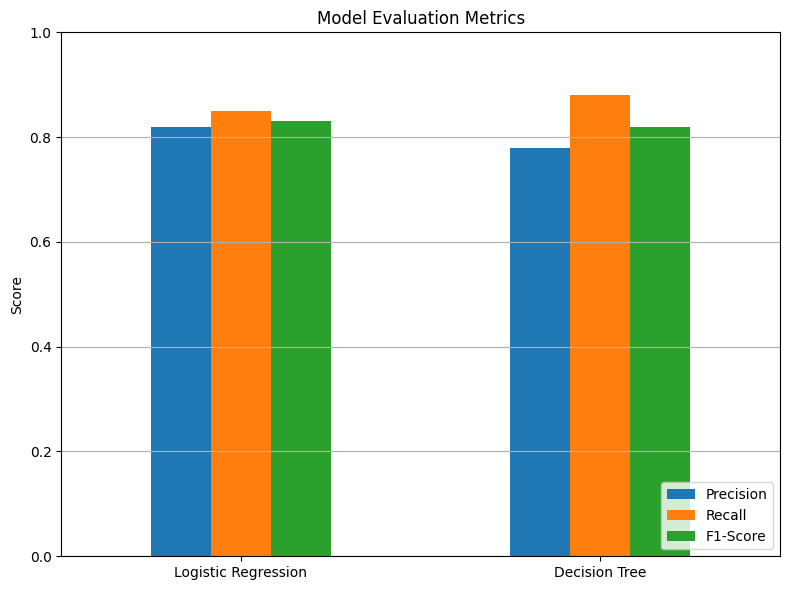

In [19]:
lr_scores = {"Precision": 0.82, "Recall": 0.85, "F1-Score": 0.83}
dt_scores = {"Precision": 0.78, "Recall": 0.88, "F1-Score": 0.82}

score_df = pd.DataFrame([lr_scores, dt_scores], index=["Logistic Regression", "Decision Tree"])

score_df.plot(kind="bar", figsize=(8, 6))
plt.title("Model Evaluation Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

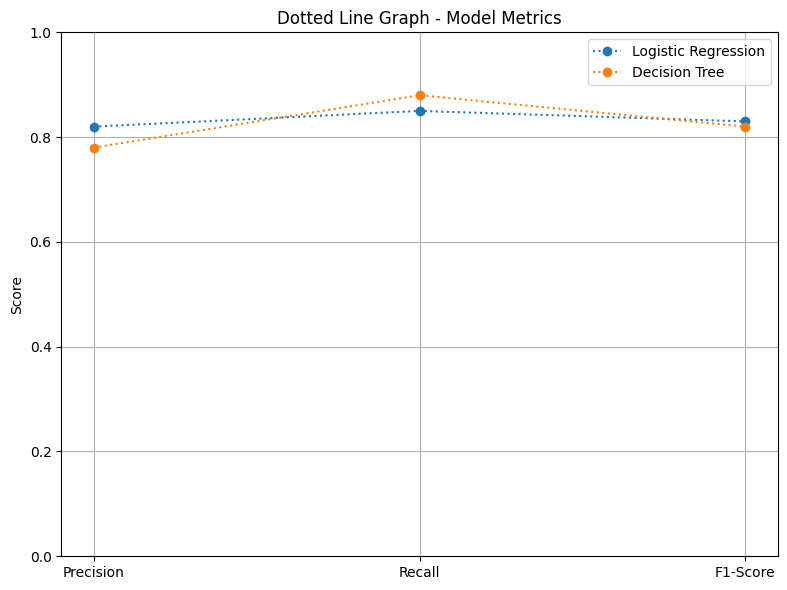

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(score_df.columns, score_df.loc["Logistic Regression"], linestyle='dotted', marker='o', label="Logistic Regression")
plt.plot(score_df.columns, score_df.loc["Decision Tree"], linestyle='dotted', marker='o', label="Decision Tree")
plt.title("Dotted Line Graph - Model Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()